## PS3 Part 2

In [1]:
import pandas as pd
import numpy as np 
import random 
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

/Users/ivychen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

#### Model 1

In [3]:
def build_model1():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [4]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 20
all_mse_histories1 = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model1()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories1.append(mse_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


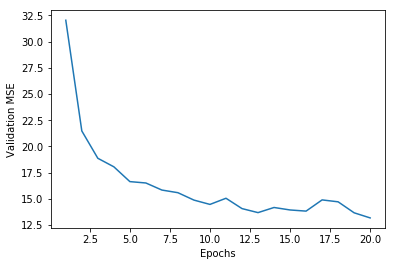

In [5]:
average_mse_history1 = [
    np.mean([x[i] for x in all_mse_histories1]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history1) + 1), average_mse_history1)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [6]:
min(average_mse_history1)

13.177965844935988

#### add number of epochs

In [7]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories11 = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model1()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories11.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


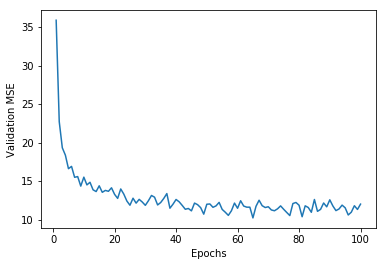

In [8]:
average_mse_history11 = [
    np.mean([x[i] for x in all_mse_histories11]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history11) + 1), average_mse_history11)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [9]:
min(average_mse_history11)

10.206165905711458

#### Model 2: with dropout

In [10]:
def build_model2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [11]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories2 = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model2()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories2.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


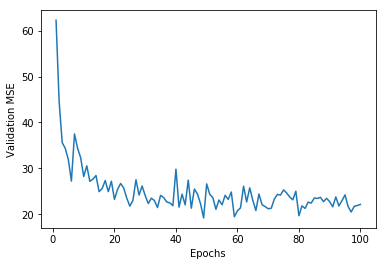

In [12]:
average_mse_history2 = [
    np.mean([x[i] for x in all_mse_histories2]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history2) + 1), average_mse_history2)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [13]:
min(average_mse_history2)

19.220060480832093

#### Model 3: add layers

In [14]:
def build_model3():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [15]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories3 = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model3()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories3.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


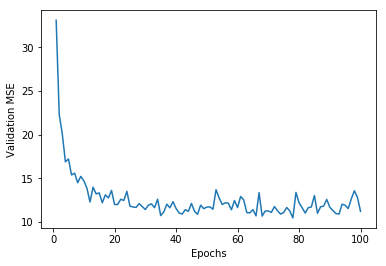

In [16]:
average_mse_history3 = [
    np.mean([x[i] for x in all_mse_histories3]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history3) + 1), average_mse_history3)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [17]:
min(average_mse_history3)

10.463086837196107

#### Model 4: add regularizer L1

In [18]:
from keras import regularizers
def build_model4():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001),
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [19]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories4 = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model4()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories4.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


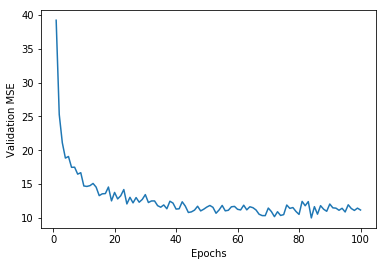

In [20]:
average_mse_history4 = [
    np.mean([x[i] for x in all_mse_histories4]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history4) + 1), average_mse_history4)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [21]:
min(average_mse_history4)

10.00100642003119

#### Model 5. add regularizer L2

In [22]:
from keras import regularizers
def build_model5():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001),
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [23]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories5 = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model5()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['val_loss']
    all_mse_histories5.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


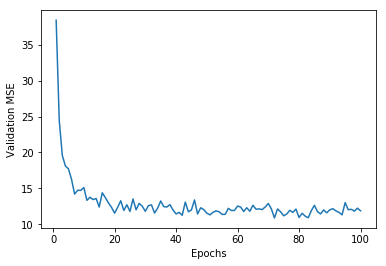

In [24]:
average_mse_history5 = [
    np.mean([x[i] for x in all_mse_histories5]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history5) + 1), average_mse_history5)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [25]:
min(average_mse_history5)

10.899980111382902

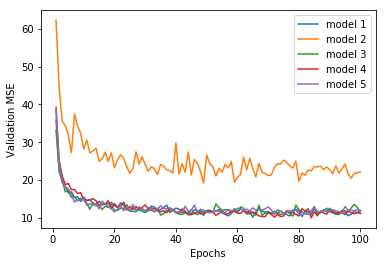

In [32]:
plt.plot(range(1, len(average_mse_history11) + 1), average_mse_history11)
plt.plot(range(1, len(average_mse_history2) + 1), average_mse_history2)
plt.plot(range(1, len(average_mse_history3) + 1), average_mse_history3)
plt.plot(range(1, len(average_mse_history4) + 1), average_mse_history4)
plt.plot(range(1, len(average_mse_history5) + 1), average_mse_history5)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend(['model 1', 'model 2', 'model 3', 'model 4', 'model 5'])
plt.show()

From the results above, it can be seen that the performacne of the four models (1,3,4,5) are similar. The model with a 5 layers and a L1 regularizer will give the minimum validation MSE. Consider the computational complexity, the model with the least layer is the most efficient one. Furthermore, the model with more layers might have the problem of overfitting, hence we choose model 1. 

In [35]:
model = build_model1()
history = model.fit(train_data, train_targets, epochs=num_epochs, batch_size=1)

Epoch 1/100
404/404 [==============================] - 2s 5ms/step - loss: 183.2499
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 22.3343
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 17.0191
Epoch 4/100
404/404 [==============================] - 1s 1ms/step - loss: 14.4078
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 12.6421
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 11.9583
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 11.0434
Epoch 8/100
404/404 [==============================] - 1s 1ms/step - loss: 11.1366
Epoch 9/100
404/404 [==============================] - 1s 1ms/step - loss: 10.5186
Epoch 10/100
404/404 [==============================] - 1s 2ms/step - loss: 9.9465
Epoch 11/100
404/404 [==============================] - 1s 1ms/step - loss: 10.0262
Epoch 12/100
404/404 [==============================] - 1s 1ms/step - loss: 9.4858
Ep

404/404 [==============================] - 1s 2ms/step - loss: 3.5897
Epoch 100/100
404/404 [==============================] - 1s 1ms/step - loss: 3.5566


In [36]:
test_mse_score = model.evaluate(test_data, test_targets)
test_mse_score

102/102 [==============================] - 1s 6ms/step


11.558805129107308